### to investigate using challenge data to test 3 band models

In [28]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from astropy.io import fits
import importlib.util
import matplotlib.pyplot as plt
import glob

In [29]:
# get 4 band images - these are lenses
IDs = [2,3,14,19,23,26]

challenge_lenses = np.zeros((6, 101, 101, 4))
for i,ID in enumerate(IDs):
    with fits.open('samples/ground_based/lens/Band1/imageSDSS_R-1{:05d}.fits'.format(ID)) as data:
        lens_band1 = data[0].data
    with fits.open('samples/ground_based/lens/Band2/imageSDSS_I-1{:05d}.fits'.format(ID)) as data:
        lens_band2 = data[0].data
    with fits.open('samples/ground_based/lens/Band3/imageSDSS_G-1{:05d}.fits'.format(ID)) as data:
        lens_band3 = data[0].data
    with fits.open('samples/ground_based/lens/Band4/imageSDSS_U-1{:05d}.fits'.format(ID)) as data:
        lens_band4 = data[0].data
    challenge_lenses[i] = np.stack([lens_band1, lens_band2, lens_band3, lens_band4], 2)

print('challenge lenses: {}'.format(challenge_lenses.shape))

challenge lenses: (6, 101, 101, 4)


In [30]:
# get 3 band images - these are lenses from decals (chris sent them)
decals_lenses = np.zeros((10, 101, 101, 3))
errors = 0
addband = 2

for i in range (10):
    im3b = fits.getdata('/Users/mac/Desktop/LBNL/decals/Lenses/gradeA/images/lens_cutout_{:06d}.fits'.format(i))
    im3b = np.transpose(im3b, (1,2,0))
    decals_lenses[i] = im3b
        
print('decals lenses: ', decals_lenses.shape)

decals lenses:  (10, 101, 101, 3)


In [31]:
files = sorted(glob.glob('/Users/mac/Desktop/LBNL/challenge_data/GroundBasedTraining/npz/*.npz'))

In [32]:
def dihedral(x, i):
    if len(x.shape) == 3:
        if i & 4:
            y = np.transpose(x, (1, 0, 2))
        else:
            y = x.copy()

        if i&3 == 0:
            return y
        if i&3 == 1:
            return y[:, ::-1]
        if i&3 == 2:
            return y[::-1, :]
        if i&3 == 3:
            return y[::-1, ::-1]

    if len(x.shape) == 4:
        if i & 4:
            y = np.transpose(x, (0, 2, 1, 3))
        else:
            y = x.copy()

        if i&3 == 0:
            return y
        if i&3 == 1:
            return y[:, :, ::-1]
        if i&3 == 2:
            return y[:, ::-1, :]
        if i&3 == 3:
            return y[:, ::-1, ::-1]

In [33]:
def prepare(images):
    # just using LASTRO values to normalize
    images[images == 100] = 0.0
    images = (images - 1.685e-12) / 5.122e-11
    return images

In [34]:
def load(files):
        # load some files into numpy array ready to be eaten by tensorflow
        xs = np.stack([np.load(f)['image'] for f in files])
        return prepare(xs)

## dihedral

xs: (10, 101, 101, 4)
xsdih: (10, 101, 101, 4)
before dihedral


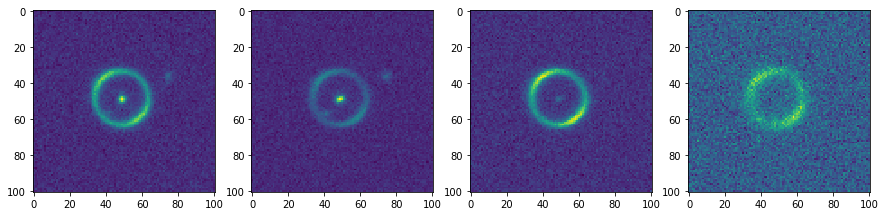

after dihedral


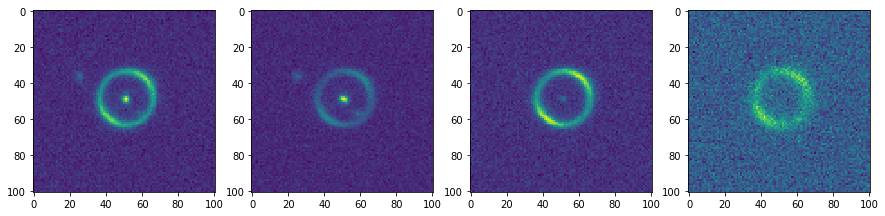

before dihedral


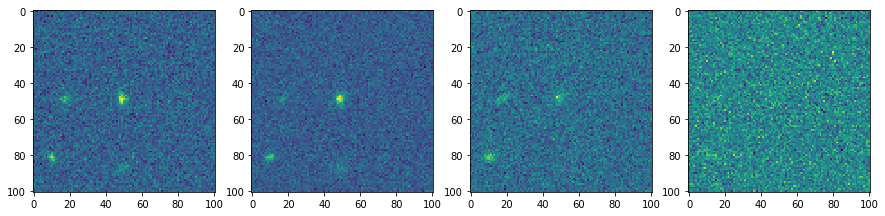

after dihedral


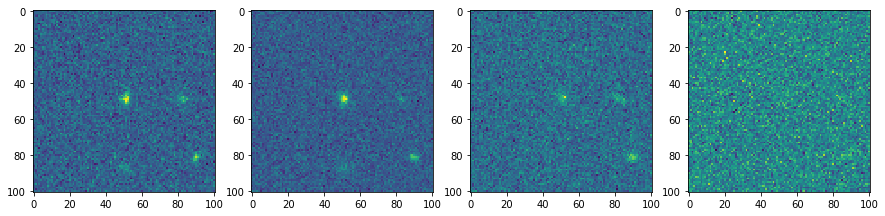

In [66]:
# this shows how dihedral works on arrays of images (len=4) as well as just images (len=3). this is with 4 band
idp = range(5)
idn = range(5,10)
ii = 1

xs = load([files[i] for i in idp] + [files[i] for i in idn])
print('xs:',xs.shape)

xsdih = dihedral(xs, ii)
print('xsdih:',xsdih.shape)

for img, imgdih in zip(xs[:2],xsdih[:2]):
    print('before dihedral')
    plt.figure(figsize=(15,10))
    plt.subplot(241)
    plt.imshow(img[:,:,0])
    plt.subplot(242)
    plt.imshow(img[:,:,1])
    plt.subplot(243)
    plt.imshow(img[:,:,2])
    plt.subplot(244)
    plt.imshow(img[:,:,3])
    plt.show()
    print('after dihedral')
    plt.figure(figsize=(15,10))
    plt.subplot(245)
    plt.imshow(imgdih[:,:,0])
    plt.subplot(246)
    plt.imshow(imgdih[:,:,1])
    plt.subplot(247)
    plt.imshow(imgdih[:,:,2])
    plt.subplot(248)
    plt.imshow(imgdih[:,:,3])
    plt.show()

(10, 101, 101, 3)
before dihedral


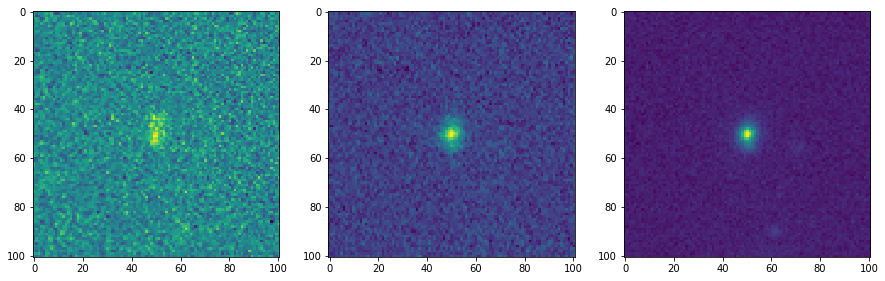

after dihedral


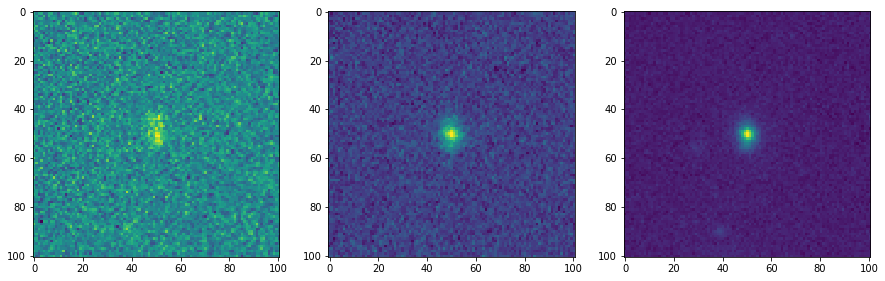

before dihedral


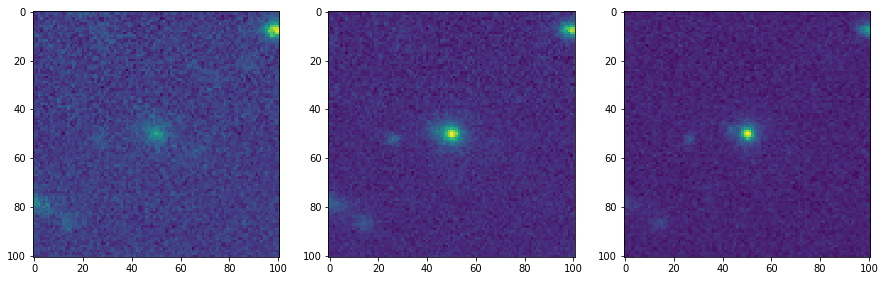

after dihedral


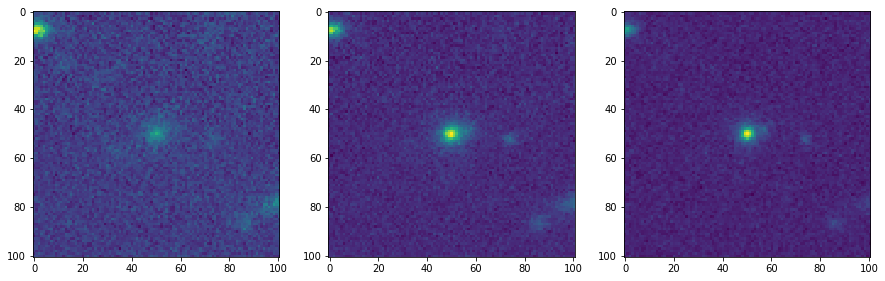

before dihedral


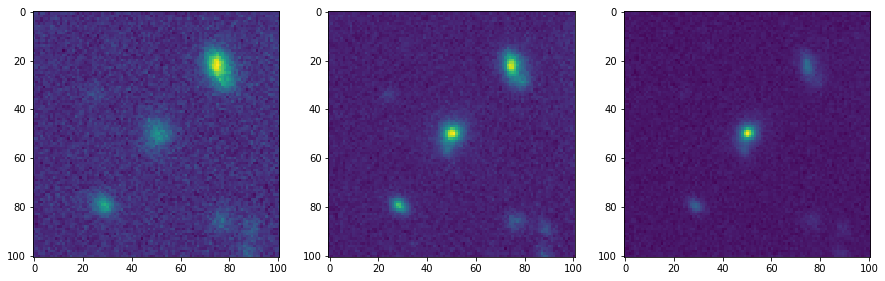

after dihedral


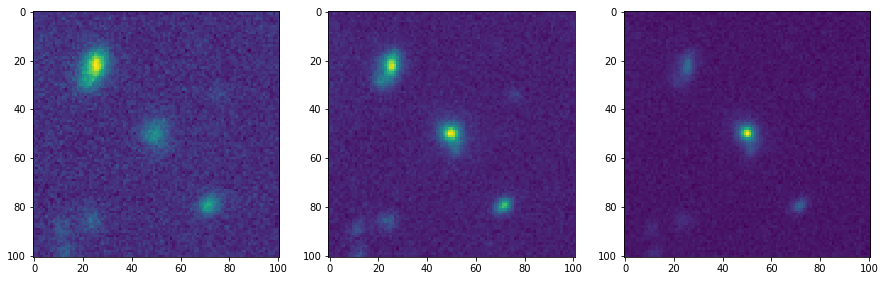

before dihedral


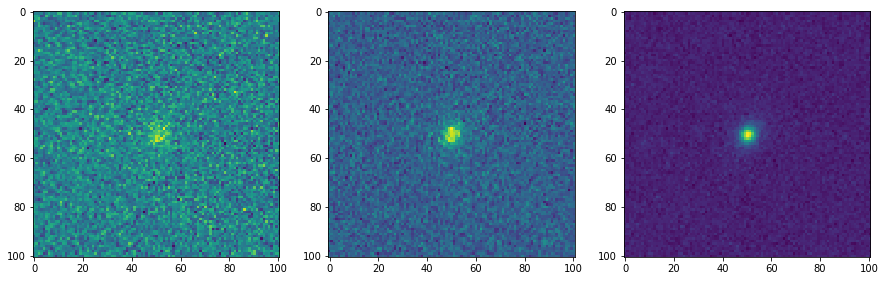

after dihedral


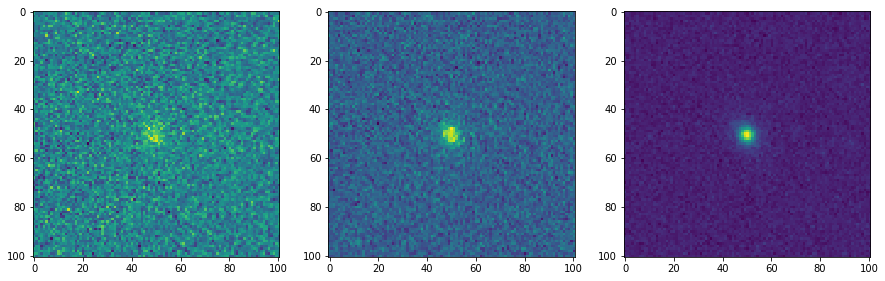

before dihedral


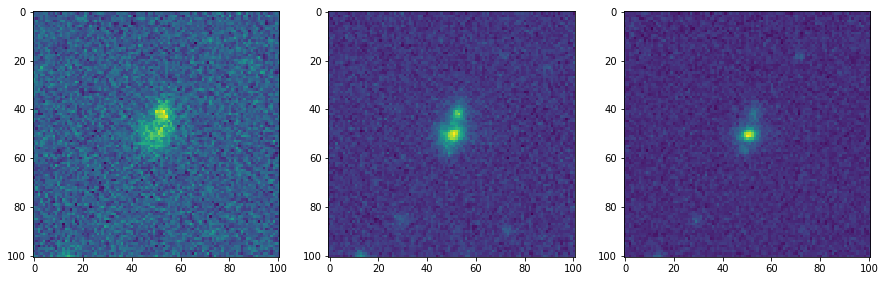

after dihedral


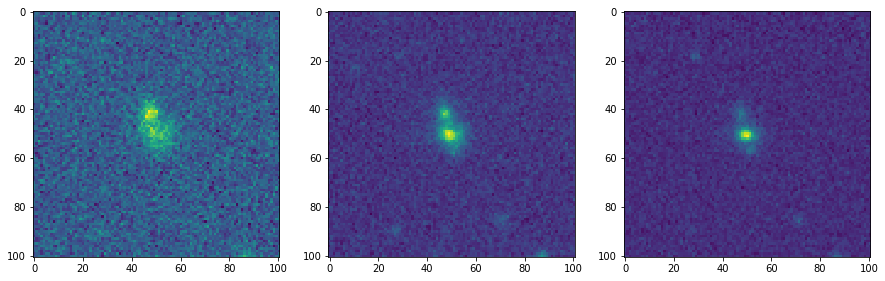

before dihedral


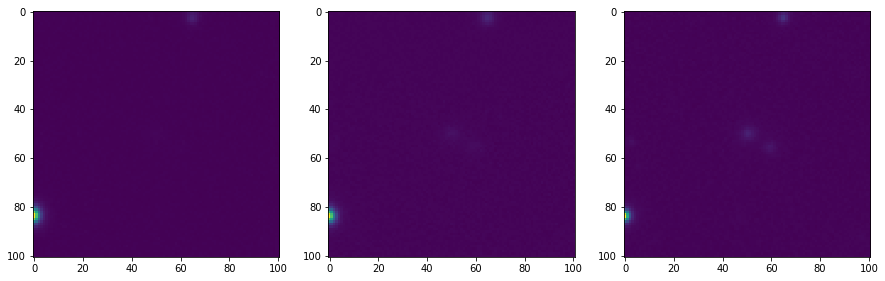

after dihedral


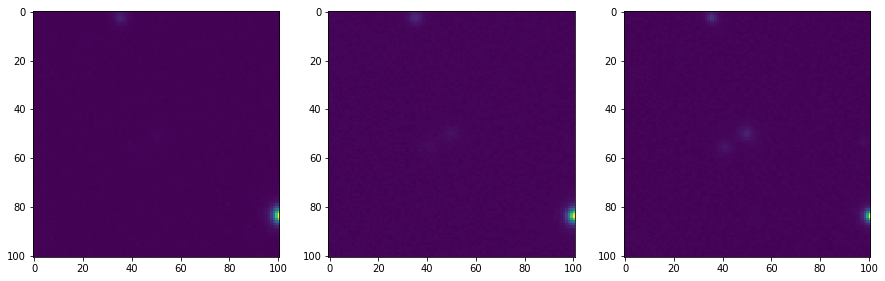

before dihedral


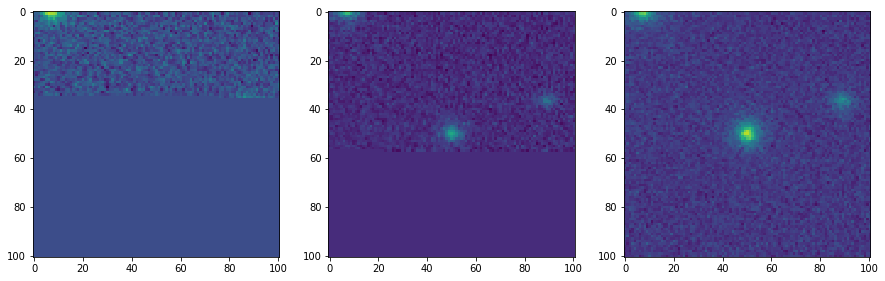

after dihedral


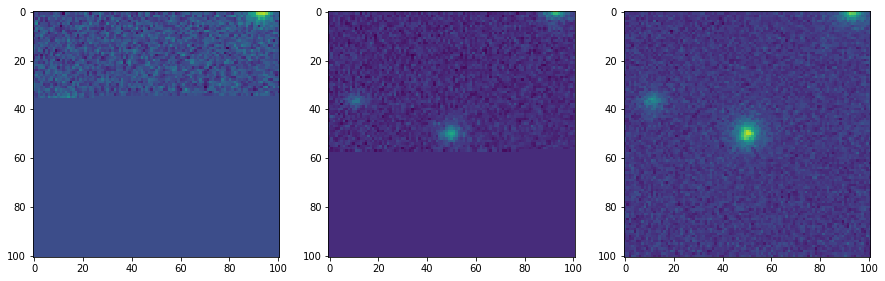

before dihedral


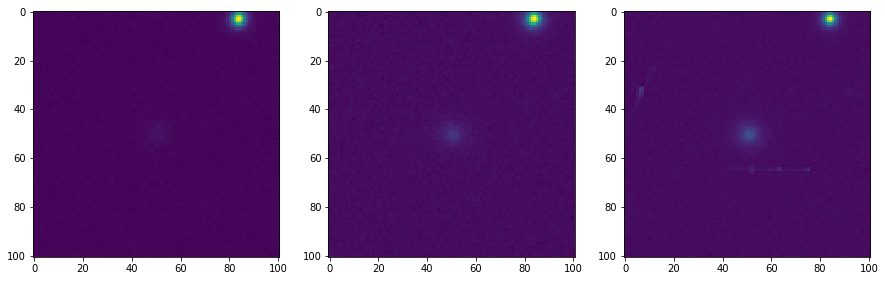

after dihedral


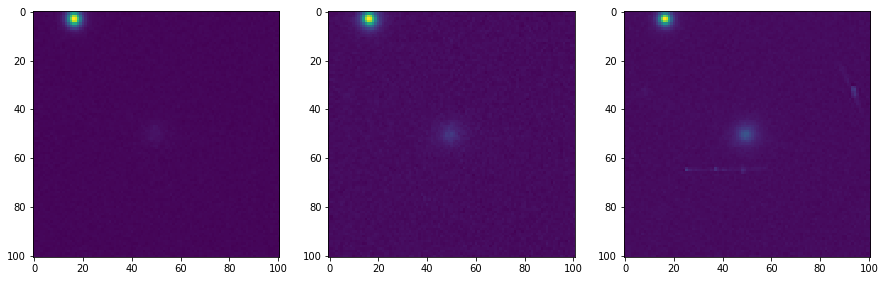

before dihedral


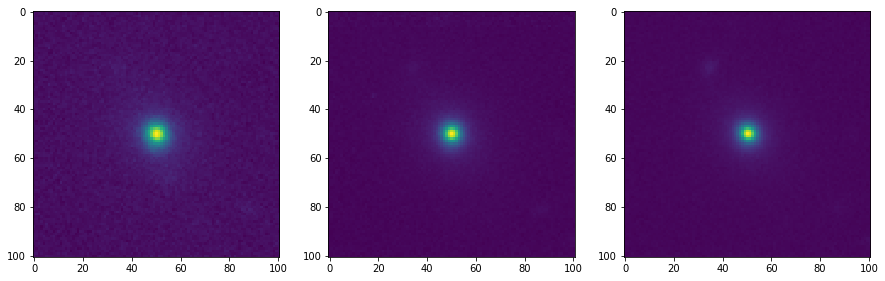

after dihedral


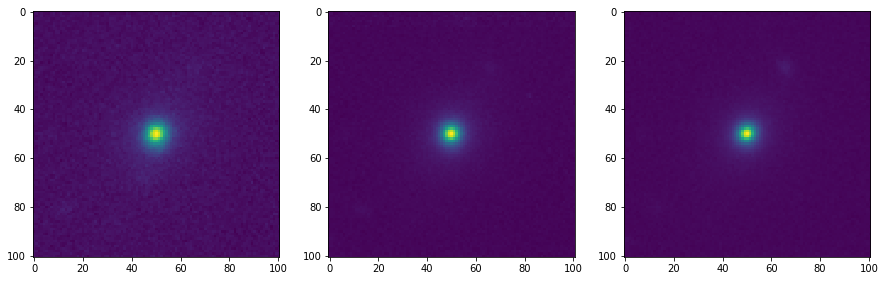

before dihedral


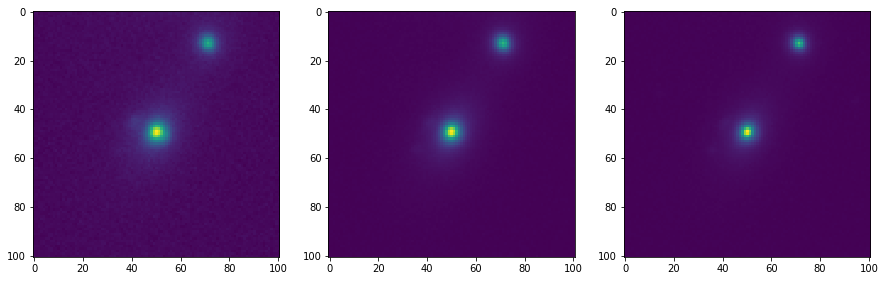

after dihedral


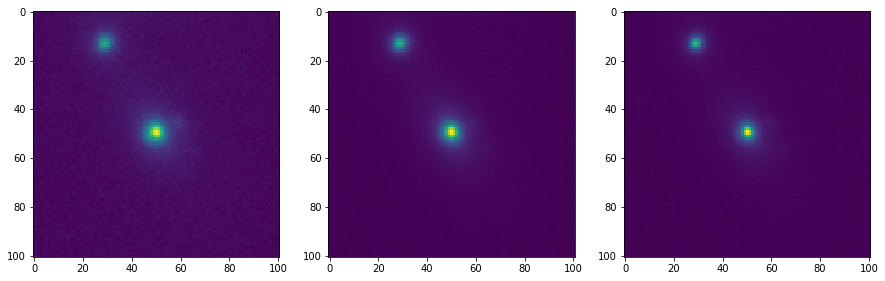

In [71]:
# yay! dihedral works with 3 band

ii = 1
decalsdih = dihedral(decals_lenses, ii)
print(decalsdih.shape)

for img, imgdih in zip(decals_lenses, decalsdih):
    print('before dihedral')
    plt.figure(figsize=(15,10))
    plt.subplot(231)
    plt.imshow(img[:,:,0])
    plt.subplot(232)
    plt.imshow(img[:,:,1])
    plt.subplot(233)
    plt.imshow(img[:,:,2])
    plt.show()
    print('after dihedral')
    plt.figure(figsize=(15,10))
    plt.subplot(234)
    plt.imshow(imgdih[:,:,0])
    plt.subplot(235)
    plt.imshow(imgdih[:,:,1])
    plt.subplot(236)
    plt.imshow(imgdih[:,:,2])
    plt.show()

## 